**UNIFACE PROJECT INTRODUCTION**

AI-generated images have many applications in computer vision, graphics, and arts -e.g. creating digital avatars. With face avatars, the underrepresentation of darker-skinned avatars, often from Black and Brown ethnicities, in popular training datasets often means that avatars depicting individuals from these ethnicities have lower semantic quality as compared to avatars depicting individuals from the majority-represented ethnicities. We borrow insights from the work on textual inversion to answer the question, “Did the augmentation of this large-scale dataset using images from an underrepresented domain improve the model’s performance on the underrepresented domain?”

We contribute two large-scale datasets: UniFace which contains a diverse set of face images, and CelebBlack which
contains images of Black celebrities. We set out to train a generative model using our datasets to synthesize image of darker-skinned individuals better than previous generative models. In this project, we introduce two image quality
metrics, CLIP Fr ́echet Distance which assesses the image quality based on CLIP image embeddings and the Fr ́echet Distance, and CLIP Attribute Score which measures the distance between two distributions of classification probability vectors. We compare the performance of our model to other generative models using FID, CLIP Score, and CLIP Fr ́echet Distance. The metrics show that using our datasets leads to generating higher-quality images of darker-skinned individuals.StarGAN 2 is a style transfer model (GAN) that generates face images with different styles.

StarGAN belongs to a particular class of generative models called generative adverserial networks (GANs). A GAN is a combined network that contains two networks a generator and discriminator.

* **A generator** is a neural network that takes in vector and outputs an image that is 'similar' to the images it was trained on.

* **A discriminator** is a neural network that takes in an image and outputs a value indicating whether the image is real or fake (artificially generated). It can be thought of as a lie detector.

**StarGAN V2 ARCHITECTURE**


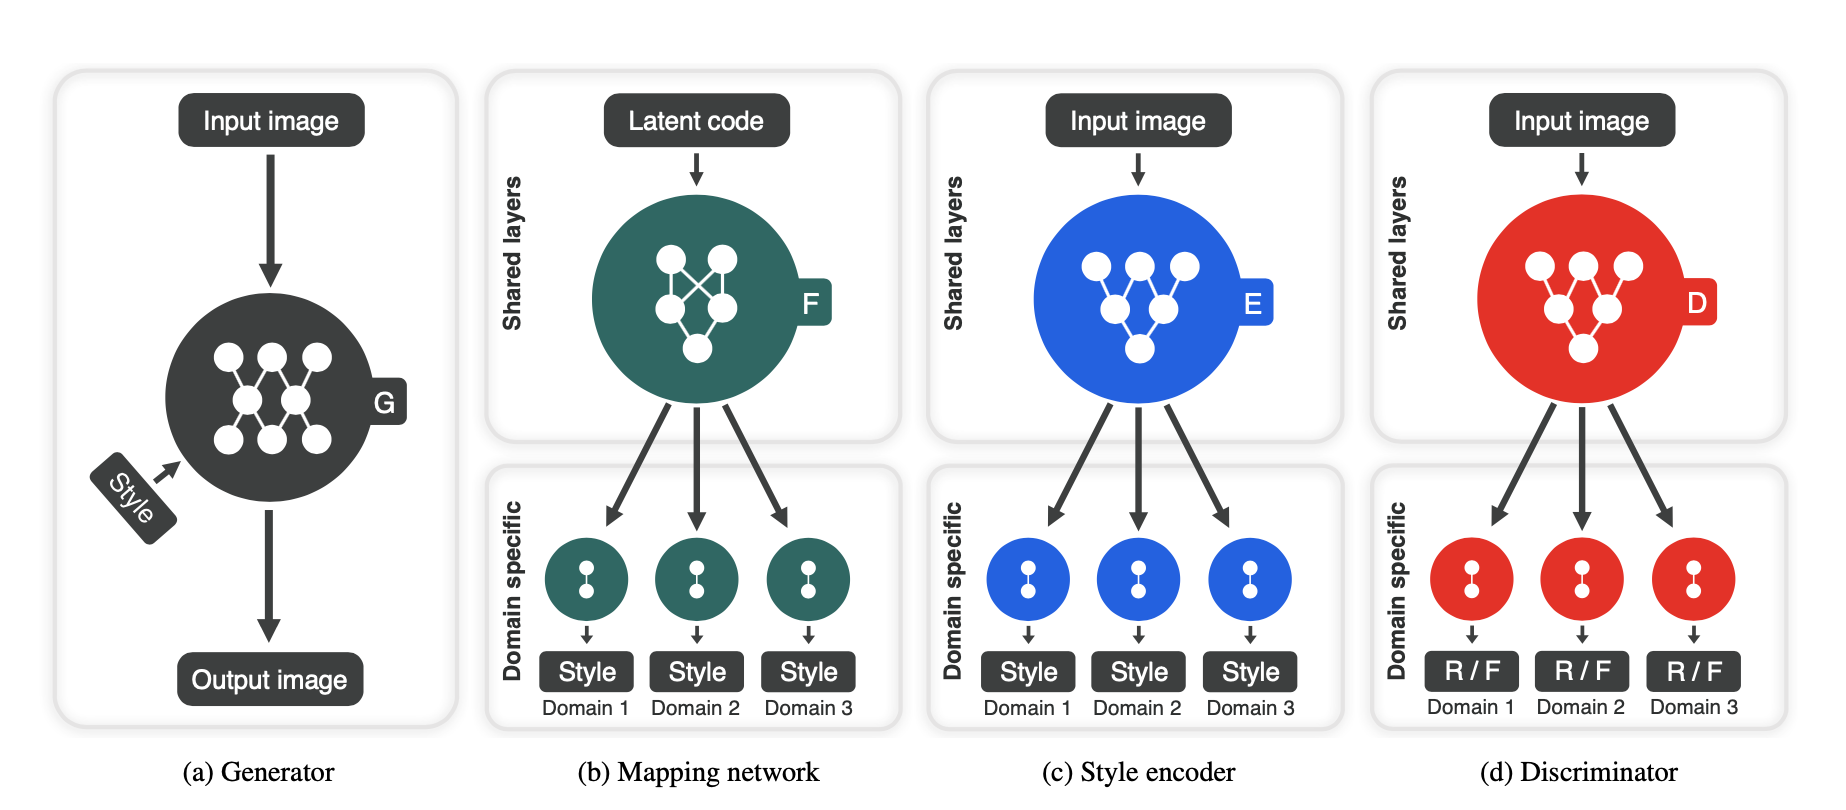



**Generator**: The generator is a neural network that takes in two inputs: a source image (x) and a style code (s). The goal is to apply the style in the style code to the sourced image to generate an entirely new face image x'. The style code is produced by either the mapping network or the style encoder.

**Mapping Network**: This network takes in a latent vector and outputs a style code (vector) based on the domain of the input vector. 

**Style Encoder**: This is a network that takes in an image an encodes the information into a style code (vector) based on the domain of the input image. There are several output channels representing the output domains.

**Discriminator**: This is a classifier model that takes in an input image and domain information and determines whether it is artificially generated or not. The StarGAN V2 generator produces more than one output because it determines whether an image is real or fake for it's given domain.




**LOSS FUNCTIONS**

NOTE : A generator produces an image using a style code (s) and an input source image (x). The goal is to apply the style (s) to the image (x) to generate a new image with a new style.


* **Adverserial Loss** : The generator, G(s,x), produces an image. The generated image is compared to the real images in the target domain. The goal is to have the generated image be as indistinguishable from the real images. The diistance between the generated image and the real image is the adverserial loss and it is a measure of how well the **style codes** are being generated 

* **Style Reconstruction Loss** : Once the generator produces an image given a style code (s), we pass this image into a style encoder to get the 'style code if the generated image ($s'$).  The style reconstruction loss is the measure of the distance between s and $s'$.

* Style Diversification Loss : We take two different latent codes $l_1$ & $l_2$ and pass them into the mapping network to output two different $s_1$ & $s_2$. We take $s_1$ & $s_2$ and pass them into the generator separately as in G(x, $s_1$) and G(x, $s_2$) and measure the similarity of the images generated in these two separate instances. The more similar the images are, the larger the loss.

* **Cycle Consistency Loss** : The loss measures whether fundamental characteristics of the source image have been preserved. First, we generate an new image, $x'$,  using the source image and a style code s as in G(x, s). Second, pass the source image into the style encoder to get the style code $s'$. Finally, we take the generated image $x'$ and the style code of the source image $s'$ and generate a second image $x''$. The loss is the difference between the source image x and the second generated image $x''$. A large difference indicates that the fundamental characteristics of the source image have been lost.


**EVALUATION METRICS**

The original StyleGAN_2 algorithm used FID score and LPIPS to measure image quality:

- **LPIPS Score**
The Learned Perceptual Image Patch Similarity is a measure of how similar two images are based on the activations from a pretrained network [1](https://torchmetrics.readthedocs.io/en/stable/image/learned_perceptual_image_patch_similarity.html). In StarGAN V2 the LPIPS score is calculated between generated images to measure the diversity of the generated images. A higher the score means the images are dissimilar and that the generated images are more diverse.

- **Fr\'echet Inception Distance**
This is the FID score designed by [2](https://proceedings.neurips.cc/paper_files/paper/2017/hash/8a1d694707eb0fefe65871369074926d-Abstract.html) measures the Fr\'echet Distance between two  distributions whose samples are feature vectors extracted from the deepest layer of the InceptionV3 model. Given a distribution with mean $m$ and covariance $C$, the FID between two distributions $a$ and $b$ is:

$$
 d^2 ((m_a, C_a),(m_b, C_b)) = ||m_a-m_b||^2_2 + Tr(C_a + C_b - 2(C_a \cdot C_b)^{\frac{1}{2}}) [1]
$$

In this project, we use preexisting metrics, CLIP Score and Cosine Similarity and introduce some new image quality metrics i.e. CLIP Attribute Score and Fr\'echet CLIP Distance
- **CLIP Cosine Similarity**
We implement the CLIP score used in [3](https://arxiv.org/abs/2208.01618). The metric is calculated by finding the average cosine similarity value between pairs of vectors between the real image domain and the generated image domain. The vectors are generated by encoding the images using the CLIP encoder in \cite{radford2021learning}. Given two sets of $n$\_dimensional vectors $A$ and $B$ with vectors $a_i,...,a_n$ and $b_i,...,b_n$ respectively the CLIP score is:

$$
\frac{\sum_{k=1}^{n} \sum_{i=1}^{n} cosine\_similarity(a_k, b_i)}
{||A|| \cdot ||B||}
$$
- **CLIP Attribute Score**
This metric was inspired by the inception score which allowed researchers to determine the quality and diversity of generated images based on the finite image classes of the ImageNet dataset. We introduce this new metric which allows researchers to assess image distributions guided by select attributes that they can determine without the need to train a new classifier. Using our metric, one can determine their own labels/attributes that they want to classify the images, they pass these text labels and the images into their respective text and image encoders in a pretrained CLIP model to generate probability vectors.  
These vectors contain $n$ probability values in the range $(0,1)$ where $n$ is the number of labels and the highest probability value within the vector determines the most appropriate label for the image. These probability vectors define the distribution of the images based on the selected attributes. With this information, we define the distance between two different distributions using two different methods. The first is using the Fr\'echet Distance (FD) equation [1] and named the **CLIP attribute score (FD)**. The second method is using the Averaged Cosine Similarity (ACS) and named the **CLIP attribute score (ACS)**.
The attributes we use for this project are: "A photo of a person with light skin tone" and " A photo of a person with dark skin tone". We could have evaluated for male and female attributes but because of the gender balance in all the datasets we employed, we chose not to include these prompts.

- **Fr\'echet CLIP Distance**
This metric is inspired by the FID score described in [1](https://torchmetrics.readthedocs.io/en/stable/image/learned_perceptual_image_patch_similarity.html). In this metric, however, the samples are feature vectors obtained from an image encoder of a pretrained CLIP model [3](https://proceedings.mlr.press/v139/radford21a.html). We finally compute this metric using equation [1] as the **Fr\'echet CLIP Distance**.


IF YOU'RE INTERESTED, GENERATE YOUR OWN IMAGES WITH THE ORIGINAL STARGAN 2 

The [original repository](https://github.com/clovaai/stargan-v2.git) requires that you import/install the dependencies and download the original model weights.

In [ ]:
# clone the repository
!git clone https://github.com/clovaai/stargan-v2.git

# create the data directories
%cd stargan-v2/
!mkdir data data/source_images data/reference_images
!mkdir data data/source_images/male data/reference_images/male
!mkdir data data/source_images/female data/reference_images/female

# download the pretrained model weights
!bash download.sh pretrained-network-celeba-hq
!bash download.sh wing

At this point you can move your own images into the male and female folders. Make sure there are images in both the source_images and reference_images.

In [ ]:
import torch
import torchvision
import cv2 
import PIL
import os
import numpy as np
from tqdm import tqdm
from IPython import display
from PIL import Image
from base64 import b64encode
torch.cuda.empty_cache()

!pip install munch
!pip install gdown
!pip install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
!pip install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0 munch==2.5.0 

In [ ]:
%cd stargan-v2
!python main.py --mode sample --num_domains 2 --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --result_dir expr/results/celeba_hq \
               --src_dir data/source_images \
               --ref_dir data/reference_images

CUSTOM STARGAN

The original StarGAN was trained on CelebA_HQ. This is a high quality largescale dataset which is ideal for deep learning. Unfortunately it is not racially balanced and therefore the image generation across racial groups needs some refinement. Below I show the racial break down of 3 largescale facial datasets: Celeba_HQ, Flickr Faces HQ (FFHQ), CelebBlack 

NB: *CelebBlack is my proposed new dataset that will be released upon publication of the paper*

**CelebBlack** is a new dataset that I collected and curated from a search engine. it contains about 17000 images of black celebrities with a wide range of skin tones and hairstyles. It was important for us to create this dataset because there is no public largescale dataset of Black people's faces and this limits the applicability of deep learning models designed for various face tasks i.e. face detection, face segmentation, and face generation. Below are a few sample images from the CelebBlack dataset.

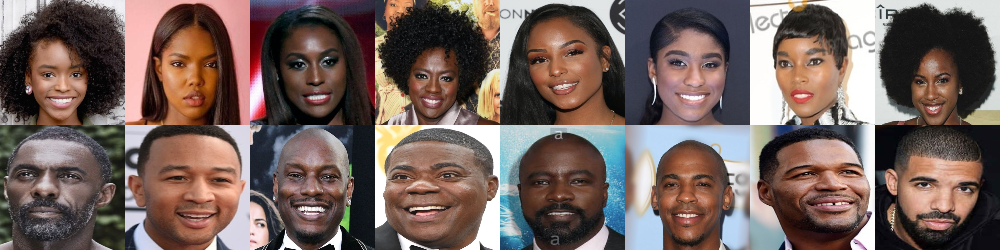
We took segmented the skin pixels (highlightged in blue below) from the training images, averaged the RGB (red,green,blue) values and plotted the distribution of skin tone values. We admit that this metric is somewhat flawed because pixel values can be affected by varying light intensity in the environment of the face.
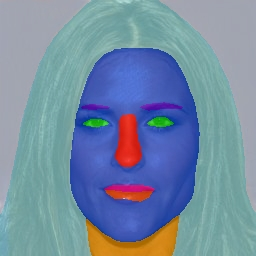

Below is a set of histograms displaying the RGB (red,green,blue) values of the skin pixels from the face images in both Celeba_HQ (baseline) and CelebBlack (ours). The shift of the orange distribution to the left shows that CelebBlack has a lot more darker skinned individuals that CelebA_HQ. Combining the two datasets will give a broad range of skintone representation. This was part of the inspiration for the project.

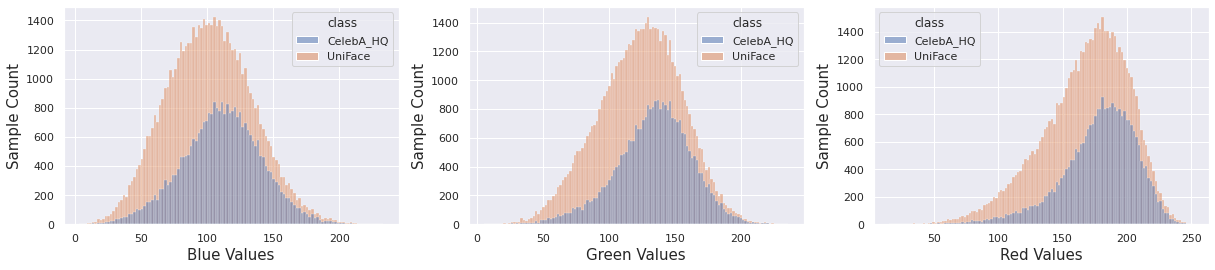

The pie charts below give the race breakdown as classified by the [FairFace classifier](https://github.com/dchen236/FairFace). The 'Indian' race domain is not well represented in ay of the 3 datasets but the improvements from augmenting the images 'Black' domain is a great proof of concept for the improvements that can be made from targeted augmentations based on selected attributes. 
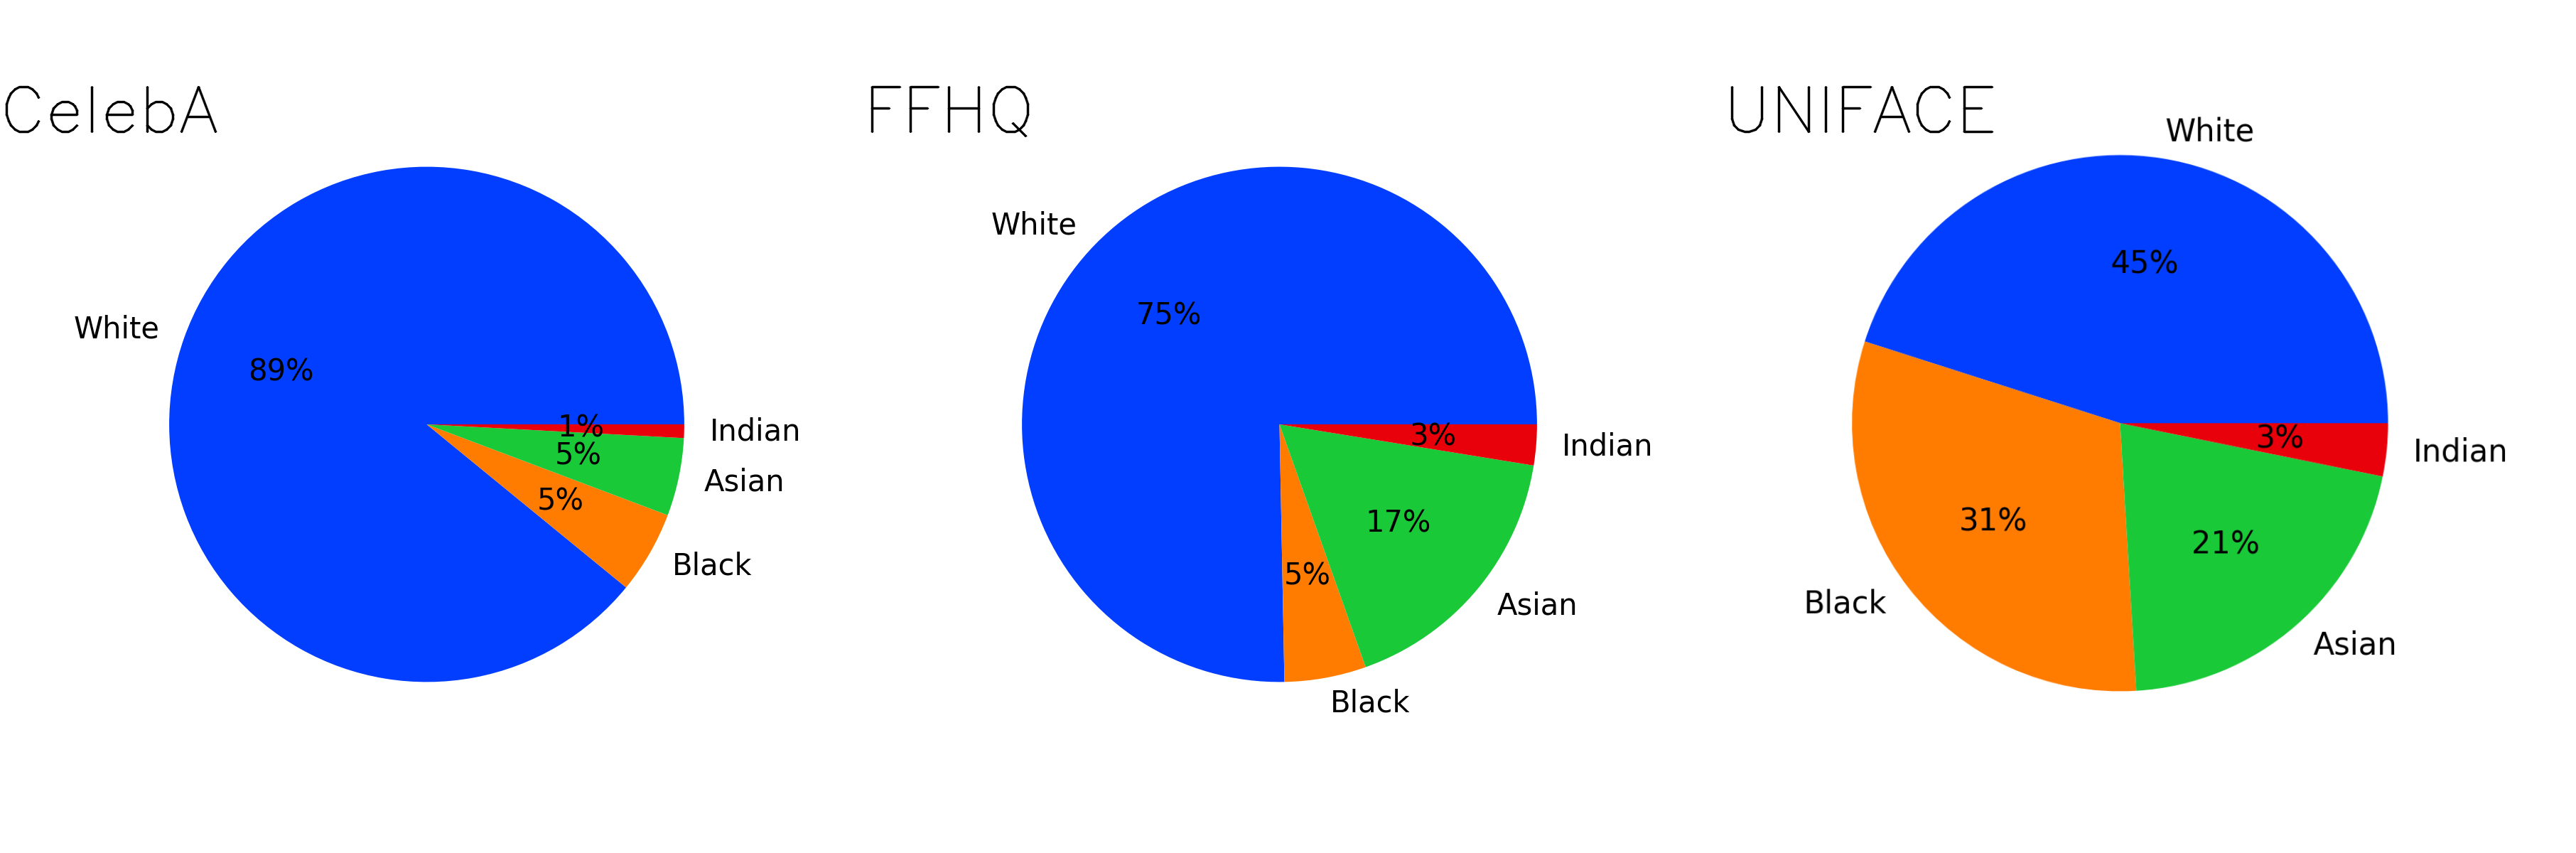


In [ ]:
# download custom model weights
!mkdir expr
%cd expr
!gdown --folder https://drive.google.com/drive/folders/10L1JwmXzwqR0ransB0rCThstC_fz-s25?usp=sharing

In [ ]:
%cd ..
!python main.py --mode sample --num_domains 2 --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/stargan_2d_aug_ckpts \
               --result_dir expr/results/celeba_custom \
               --src_dir data/source_images \
               --ref_dir data/reference_images

**RESULTS** The image below shows the source images (top row) and the styling images (left column) and the differences between image generation in the custom UniFace trained StarGAN V2 model (middle column) vs the original CelebA trained StarGAN V2 model (right column). The visual diversity of the images on the right in terms of skin tone, face shape and even hairstyle shows the importance of augmenting the dataset. There is a tradeoff when selecting models between identity maintenance and domain specific styling. These are addressed in future research.





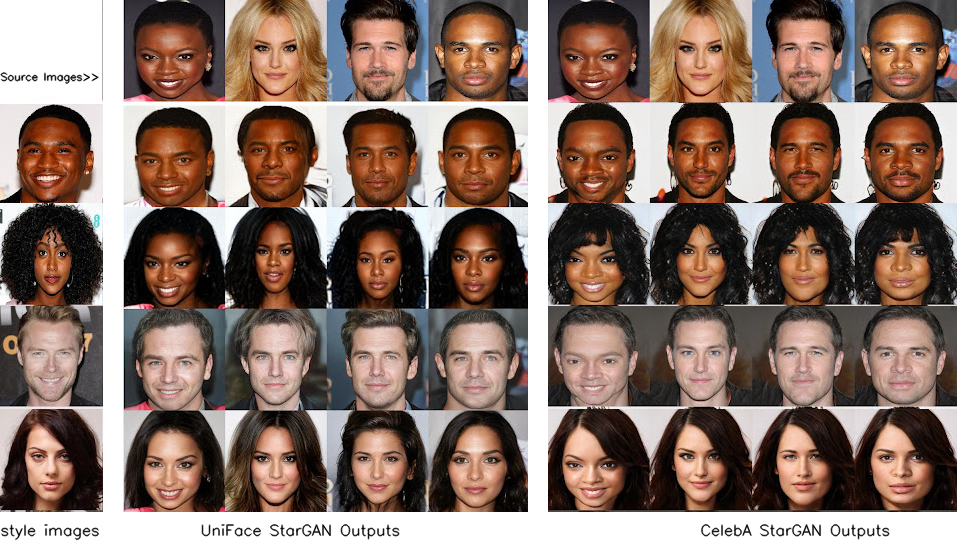

The video above shows the visual output of the custom trained model. Given a source image and a reference image, the style of the reference image gets transfered to the source image to produce a new image. The generated faces are on the lower right side of the grid. :)

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('9kkhbyFn9Qw?', width=800, height=600)